# Midterm Project : M.A.F.I.A. in the morning(final)
* * *

## 4. 경찰은 마피아를 찾고, 메딕은 시민을 살립니다.
* 경찰도 메딕도 있는 게임을 생각해 봅시다.

In [151]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import random

### 구현 방법

- practice1을 기반으로 경찰을 추가
- 경찰은 마피아를 찾음
    - 편의를 위해 구현은 낮에 하였으나 살인이 끝난 후 새벽에 마피아를 검거한다는 설정
- 랜덤하게 참가자중 한 명을 찾고 마피아인지 확인
    - 마피아가 맞다면 인덱스를 반환
- 낮투표중 경찰의 신뢰도를 랜덤하게 반환
    - 신뢰도는 참가 인원 중 몇 명을 신뢰하게 만들었는지로 확인
    - 과반수 이상 일 경우 기존 투표결과를 경찰이 찾은 마피아로 변경

### Code

- 기존 코드에서의 변경 내용을 표시

In [152]:
def job_Init(num, job, list):
    for i in range(0, num):
        list.append(job)

def people_Count(list):
    mafia=list.count("mafia")
    citizen=list.count("citizen")
    police=list.count("police")
    medic=list.count("medic")
    participant = mafia + citizen + police
    return mafia, citizen, police, medic, participant

def modefinder(numbers):
    c = Counter(numbers)
    mode = c.most_common(1)
    return mode[0][0]

- police_Find(리스트) : 참가 인원 중 랜덤하게 한 명을 지목해 마피아를 찾으면 그 인덱스를 반환

In [153]:
def police_Find(participant):
    arrest=random.randrange(0, len(participant)-1)
    if participant[arrest]=="police":
        police_Find(participant)
    elif participant[arrest] == "mafia":
        return arrest
    return None

- police_arrest(인덱스, 리스트) : 경찰이 살아있을 때, 경찰에 대한 시민의 신뢰도를 랜덤하게 결정, 과반수 이상일 때 마피아 인덱스를 반환

In [154]:
def police_arrest(vote, participants):
    if participants.count("police") == 0:
        return vote
    else:
        trust=random.randrange(0, len(participants))
        if trust*2 > len(participants):
            find = police_Find(participants)
            if find!=None:
                return find
    return vote

- medic_Save(리스트, 인덱스) : 메딕이 살아있을 때, 랜덤하게 한 명을 지목하고 마피아의 지목과 곂칠 경우 True를 반환

In [155]:
def medic_Save(participants, kill):
    if participants.count("medic") == 0:
        return False
    save=random.randrange(0, len(participants))
    if save==kill:
        # print("save")
        return True
    return False

# def medic_Save(participants, kill):
#     return True

- 낮투표의 최빈값을 계산, 경찰의 신뢰도가 과반수 이상이면 투표를 무시하고 마피아를 검거

In [156]:
def day_Vote(participants):
    vote_list=list()
    mafia_count=participants.count("mafia")
    for i in range(0, len(participants)):
        if participants[i]=="mafia":
            vote=random.randrange(mafia_count, len(participants))
            vote_list.append(vote)
        else:
            vote=random.randrange(0, len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    max_vote=police_arrest(max_vote, participants)
    del participants[max_vote]
    return participants

In [157]:
def night_Kill(participants):
    vote_list=list()
    mafia_idx=0
    mafia_count=participants.count("mafia")
    while(participants[mafia_idx] == "mafia"):
        vote=random.randrange(mafia_count, len(participants))
        vote_list.append(vote)
        mafia_idx+=1
    max_vote=modefinder(vote_list)
    if medic_Save(participants, max_vote)==False:
        del participants[max_vote]
    return participants

In [158]:
def in_Game(participants):
    turn = "morning"
    mafia, citizen, police, medic, people = people_Count(participants)
    while (mafia > 0) & (people-mafia > mafia) == True:
        if turn == "morning":
            participants = day_Vote(participants)
            turn = "night"
        else:
            participants = night_Kill(participants)
            turn = "morning"
        mafia, citizen, police, medic, people = people_Count(participants)
        # print(participants)
    if mafia == 0:
        return True
    else:
        return False
    
# participants=["mafia", "citizen", "citizen","citizen","citizen","citizen", "citizen","citizen","citizen", "citizen", "medic"]
# in_Game(participants)

In [159]:
def citizen_win_Rate(participants):
    wincount = 0
    mafia=participants.count("mafia")
    citizen=participants.count("citizen")
    police=participants.count("police")
    medic=participants.count("medic")
    times=100
    for i in range(0,times):
        participants=list()
        job_Init(mafia, "mafia", participants)
        job_Init(citizen, "citizen", participants)
        job_Init(police, "police", participants)
        job_Init(medic, "medic", participants)
        if in_Game(participants) == True:
            wincount += 1
    return 100*wincount/times

In [160]:
def Mafia_Game_withAllStats(num_mafia, num_citizen, num_police, num_medic, times):
    mafia = num_mafia
    citizen = num_citizen
    police = num_police
    medic=num_medic
    citizen_win_list=list()
    for i in range (0, times):
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(police, "police", Game_participants)
        job_Init(medic, "medic", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

#Mafia_Game_withPolice_Stats(1,0,9)

In [161]:
def Mafia_Game_changewithAll(num_mafia, num_citizen, num_police, num_medic):
    mafia = num_mafia
    citizen = num_citizen
    police = num_police
    medic=num_medic
    participants = mafia + citizen + police
    citizen_win_list=list()
    while mafia*2 < participants:
        mafia += 1
        citizen -= 1
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(police, "police", Game_participants)
        job_Init(medic, "medic", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

### Data Frame
- 마피아가 2명, 시민이 6명, 경찰이 1명, 메딕이 1명일 때 100번의 게임 중 시민의 우승 확률을 100번 구함

In [162]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_withAllStats(2, 6, 1, 1, 10)
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,18.0
2,11.0
3,14.0
4,15.0
5,9.0
6,11.0
7,9.0
8,9.0
9,12.0
10,14.0


### Histogram

x축은 횟수, y축은 시민의 승률

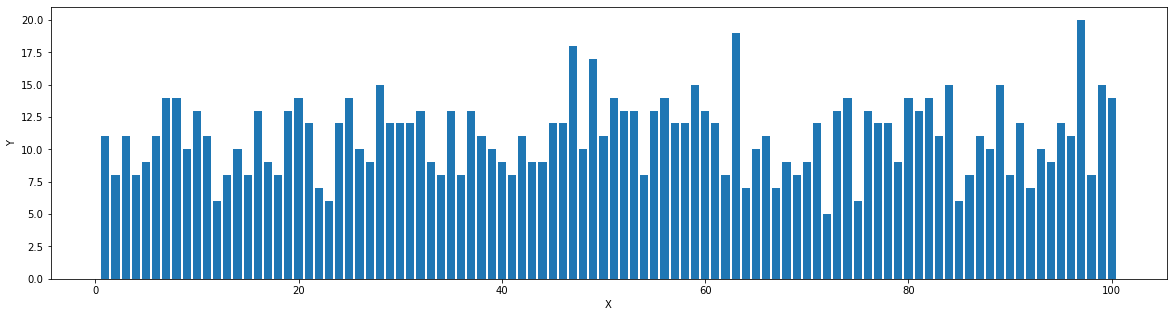

In [163]:
def drawPLT(list1):
    length=len(list1)
    list2 = list()
    for i in range(1, length+1):
        list2.append(i)
    plt.figure(figsize=(20,5))
    plt.bar(list2, list1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    plt.close()

Game_Stats = Mafia_Game_withAllStats(2, 6, 1, 1, 100)
drawPLT(Game_Stats)

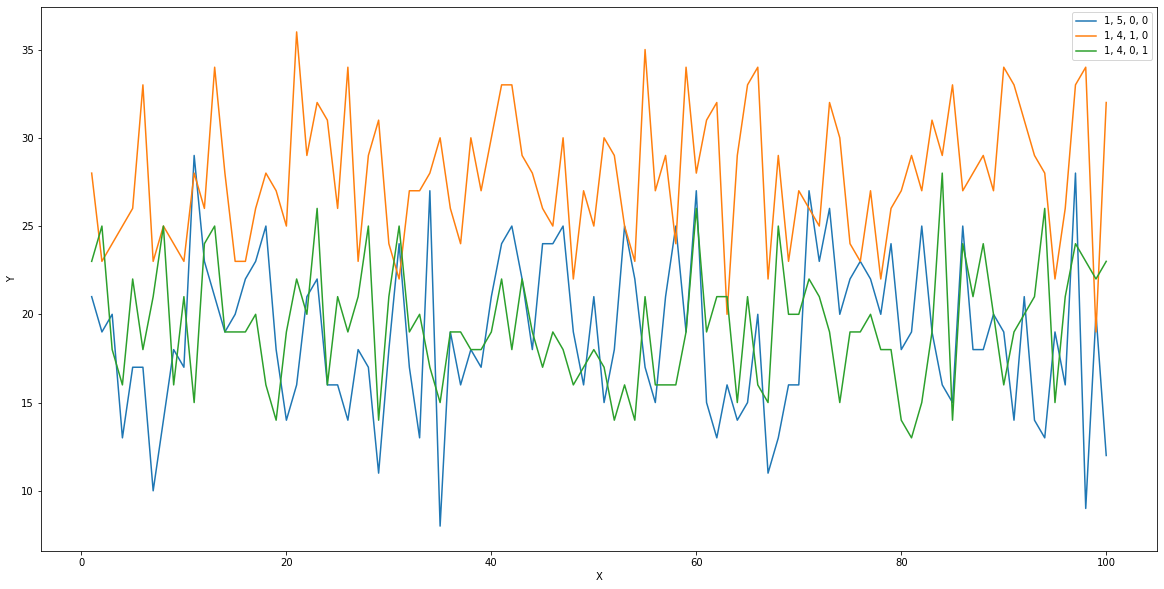

In [164]:
Game_Stats1 = Mafia_Game_withAllStats(1, 5, 0, 0, 100)
Game_Stats2 = Mafia_Game_withAllStats(1, 4, 1, 0, 100)
Game_Stats3 = Mafia_Game_withAllStats(1, 4, 0, 1, 100)

list0 = list()
length = len(Game_Stats1)
for i in range(1, length+1):
    list0.append(i)
    
plt.figure(figsize=(20,10))
plt.plot(list0, Game_Stats1, label="1, 5, 0, 0")
plt.plot(list0, Game_Stats2, label="1, 4, 1, 0")
plt.plot(list0, Game_Stats3, label="1, 4, 0, 1")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

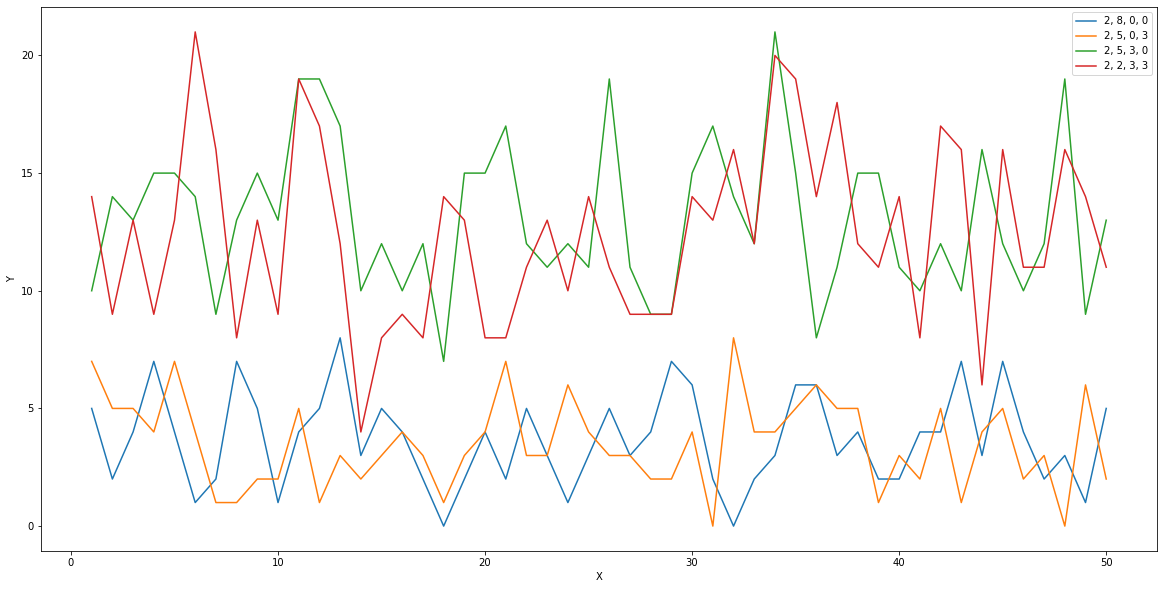

In [165]:
Game_Stats1 = Mafia_Game_withAllStats(2, 8, 0, 0, 50)
Game_Stats2 = Mafia_Game_withAllStats(2, 5, 0, 3, 50)
Game_Stats3 = Mafia_Game_withAllStats(2, 5, 3, 0, 50)
Game_Stats4 = Mafia_Game_withAllStats(2, 2, 3, 3, 50)
list0 = list()
length = len(Game_Stats1)
for i in range(1, length+1):
    list0.append(i)
    
plt.figure(figsize=(20,10))
plt.plot(list0, Game_Stats1, label="2, 8, 0, 0")
plt.plot(list0, Game_Stats2, label="2, 5, 0, 3")
plt.plot(list0, Game_Stats3, label="2, 5, 3, 0")
plt.plot(list0, Game_Stats4, label="2, 2, 3, 3")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()
# 74 78 / 2 7 1 : 75.47

### Data Frame
- 경찰 3명을 포함한 전체 게임인원 100명 중 마피아의 비율(%)을 인덱스로 하여 확률을 나타냄

In [166]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_changewithAll(0, 94, 3, 3)
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,81.0
2,64.0
3,41.0
4,45.0
5,29.0
6,16.0
7,7.0
8,6.0
9,3.0
10,1.0


### Histogram

- 경찰 3명을 포함한 전체 게임인원 각 10, 50, 100명
- x축은 마피아의 명 수, y축은 시민의 승률

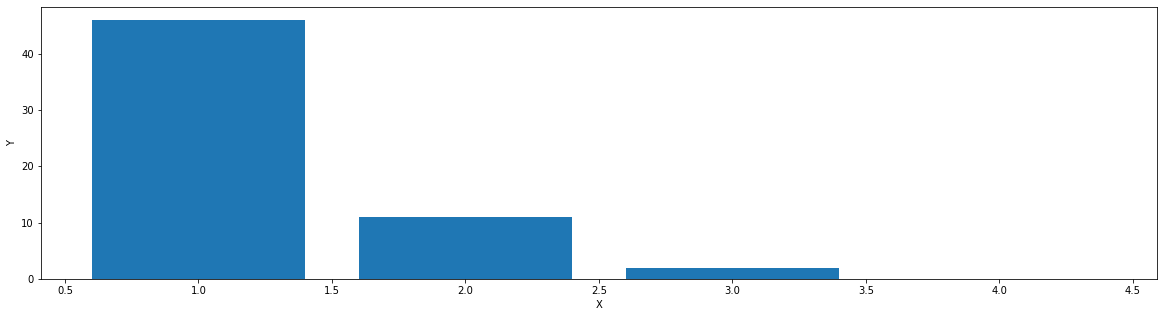

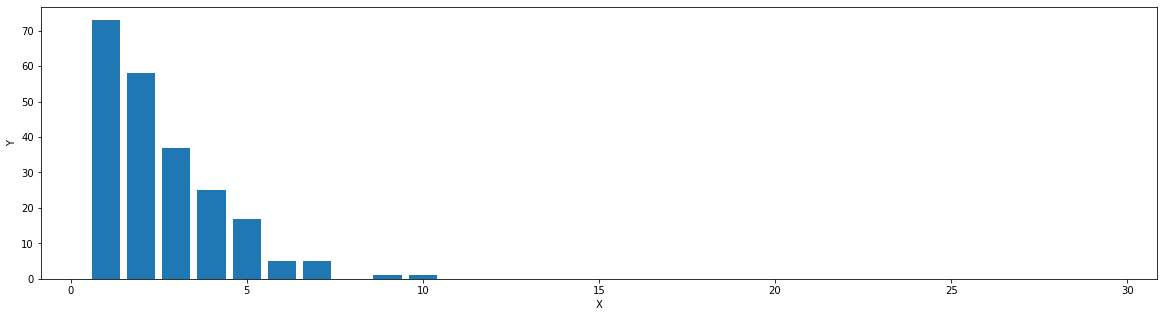

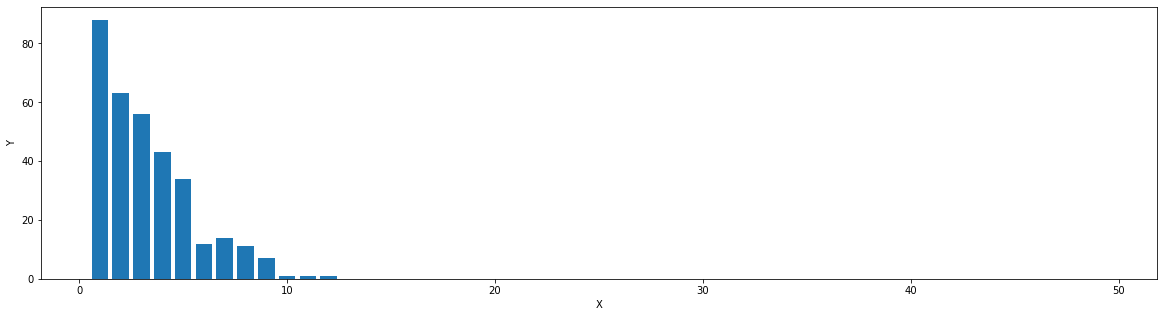

In [167]:
Game_Stats = Mafia_Game_changewithAll(0, 4, 3, 3)
drawPLT(Game_Stats)

Game_Stats = Mafia_Game_changewithAll(0, 54, 3, 3)
drawPLT(Game_Stats)

Game_Stats = Mafia_Game_changewithAll(0, 94, 3, 3)
drawPLT(Game_Stats)

### Histogram

- 전체 게임인원 10명, 경찰의 비율을 조정
- x축은 마피아의 명 수, y축은 시민의 승률

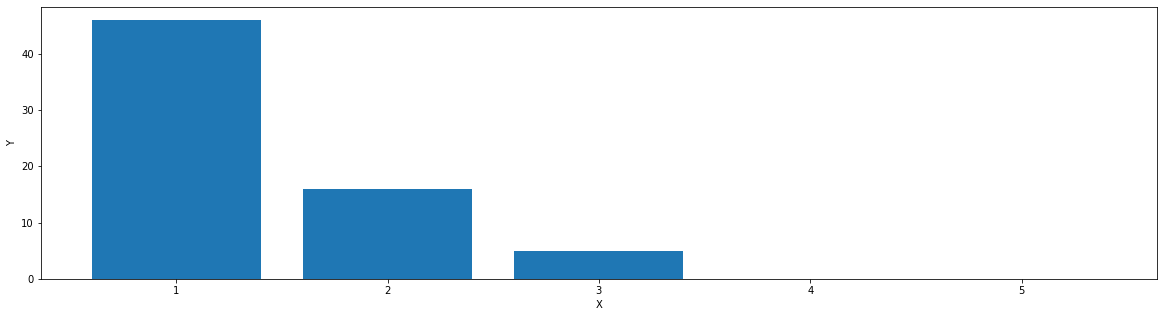

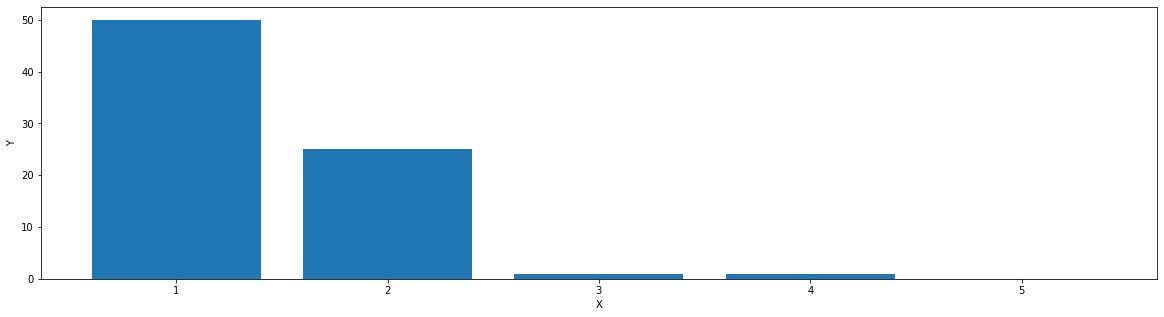

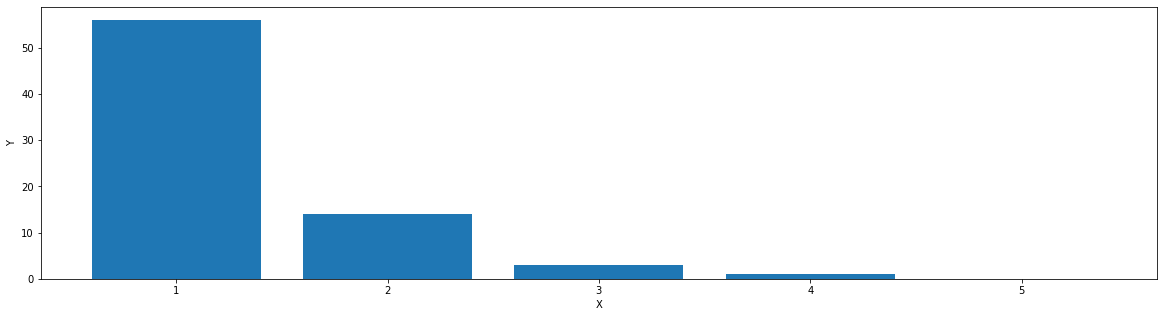

In [168]:
Game_Stats = Mafia_Game_changewithAll(0, 9, 1, 1)
drawPLT(Game_Stats)
Game_Stats = Mafia_Game_changewithAll(0, 8, 2, 1)
drawPLT(Game_Stats)
Game_Stats = Mafia_Game_changewithAll(0, 7, 3, 1)
drawPLT(Game_Stats)

## 제출 방법
* Due Date: 2021년 11월 26일 23시 59분
* LMS (https://myclass.ssu.ac.kr)에 제출합니다.
    * 파일은 STAT2021_PR1_20212021_홍길동.zip 형태로 부탁드립니다
    * 이 형태가 아닌 경우 제대로 제출되지 않을 수 있습니다.
    * 보고서 PDF파일과 소스코드를 압축해서 한 파일로 만들어주세요 (HWP로 내시면 화낼거에요)
    * 제발 간절히 부탁합니다. egg 혹은 alz는 쓰지 말아주세요... (감점할거에요 -_-+)
    * 제대로 전송이 안되면 개별 파일을 따로 올리셔도 됩니다.
    * 구현체는 제대로 작동을 하면 어떤 형태도 좋습니다.
    * 점수의 차이는 주로 해 보신 실험과 보고서에서 있을 것입니다. 재밌는 실험 많이 해보세요. 굿럭!